# KNN and CV in Python

#### The following site was used to perform data cleaning: https://opendata.cityofnewyork.us/data/#datasetscategory

In [1238]:
# loading libraries
import numpy as np 
#Numpy is the core library for scientific computing in Python. np is an alias pointing to numpy

import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
#Pandas is widely used Python library in data science mainly used for data munging.

import matplotlib as plt

import seaborn as sns 
#Seaborn is a Python visualization library based on matplotlib providing a high-level interface for drawing attractive statistical graphics.


# define column names
#names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# loading training data
#df = pd.read_csv('path/iris.data.txt', header=None, names=names)
#df.head()

## Step 1 : Importing libraries and the data set:

In [1239]:
#fp="C:/Vaibhavi/ML & Stat/pollution_us_2000_2016/pollution_us_2000_2016.csv"
fp="C:/Vaibhavi/ML & Stat/Automobile_data.csv"

result=pd.read_csv(fp,dtype=object)#accessing fp to read .csv file using pd.read_csv()
#pd.read_csv(sio, dtype={"user_id": int, "username": object})
result.head() #displays first 5 rows from the dataframe.

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


### Output 1 :
From the first glance at the dataset we can say that , our data set has 26 columns which include the various autoomobile features.However the coulmn names are difficult to interpret and need to be changed.

In [1240]:
result.count()

symboling            205
normalized-losses    205
make                 205
fuel-type            205
aspiration           205
num-of-doors         205
body-style           205
drive-wheels         205
engine-location      205
wheel-base           205
length               205
width                205
height               205
curb-weight          205
engine-type          205
num-of-cylinders     205
engine-size          205
fuel-system          205
bore                 205
stroke               205
compression-ratio    205
horsepower           205
peak-rpm             205
city-mpg             205
highway-mpg          205
price                205
dtype: int64

# Data Cleaning

## Step 2: Quick Data Exploration

In [1241]:
column_names = {'symboling': 'Symboling (Risk Factor)', 'normalized-losses': 'Normalized_Losses',
                'make': 'Manufacturer', 'fuel-type': 'Fuel_Type', 
                'aspiration': 'Aspiration', 'num-of-doors':'Number_of_Doors',
                'body-style': 'Body_Style', 'drive-wheels': 'Drive_Wheels','engine-location': 'Engine_Location',
                'wheel-base':'Wheel_Base','length':'Length',
                'width':'Width','height':'Height',
                'curb-weight':'Curb_Weight','engine-type':'Engine_Type','num-of-cylinders':'Number_of_Cylinders',
                'engine-size':'Engine_Size','fuel-system':'Fuel_System','bore':'Bore','stroke':'Stroke',
                'compression-ratio':'Compression_Ratio','horsepower':'Horsepower','peak-rpm':'Peak_RPM',
                'city-mpg':'City_MPG','highway-mpg':'Highway_MPG','price':'Price'}

#Removed the irrelevant columns of Symboling and Normalized Losses as they were helped in risk assement and not for our study.
result = (result.rename(columns=column_names)
        #renames the columns names as declared above
    .dropna(thresh=4)                    #keeps the rows having atleast 4 non-NA values
    [['Manufacturer', 'Fuel_Type',
     'Aspiration','Number_of_Doors','Body_Style','Drive_Wheels','Engine_Location','Wheel_Base','Length'
      ,'Width','Height','Curb_Weight','Engine_Type','Engine_Size','Fuel_System',
     'Compression_Ratio','Horsepower','Peak_RPM',
                'City_MPG','Highway_MPG','Price']] #columns to be displayed in outpit
    #.assign(date=lambda x: pd.to_datetime(x['Decision_Date'], format='%m/%d/%Y'))
    #.set_index('Decision_Date', append=True)
    .rename_axis(["auto_id"])
    .sort_index())

result.head()

,Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Length,Width,...,Curb_Weight,Engine_Type,Engine_Size,Fuel_System,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price
auto_id,,,,,,,,,,,,,,,,,,,,,
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,152,mpfi,9,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,109,mpfi,10,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,136,mpfi,8,115,5500,18,22,17450


### Output 2:
The above output shows that the column names are now changed.
However, after taking a closed look at the numeric data, we can see that in many rows the string '?' appears instead of numeric values.
Hence, we can conclude that we need to investigate and address the missing values in the dataset.

## Step 3: Data Munging 


During the exploration of the data we found a few problems with the data which needs to be addressed before we can call it a good data model.

The following are the problems we found:
1. There are a few rows in the dataset that contain string '?' in numeric columns.
2. We need to estimate these missing values wisely in order to perform futher analysis.

In [1242]:
#Stripping put the '?' strings in the data as it is incorrect information which is of no use to us:

result['Number_of_Doors'] = result['Number_of_Doors'].map(lambda x: x.lstrip('?'))
result['Horsepower'] = result['Horsepower'].map(lambda x: x.lstrip('?'))
result['Peak_RPM'] = result['Peak_RPM'].map(lambda x: x.lstrip('?'))
result['Price'] = result['Price'].map(lambda x: x.lstrip('?'))

#syntax of map() :map(function_to_apply, list_of_inputs)
#map() applies a function to all the items in an input_list.

result.head()

,Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Length,Width,...,Curb_Weight,Engine_Type,Engine_Size,Fuel_System,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price
auto_id,,,,,,,,,,,,,,,,,,,,,
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,152,mpfi,9,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,109,mpfi,10,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,136,mpfi,8,115,5500,18,22,17450


### Output 3:
The above output shows that the using the lstrip() function , the unwanted strings '?' have been removed from the dataset.

## Step 4 : Data Exploration

In [1243]:
result.apply(lambda x: sum(x.isnull()),axis=0)

#syntax : apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds)
#Return type of apply() depends on whether passed function aggregates, or the reduce argument if the DataFrame is empty.

Manufacturer         0
Fuel_Type            0
Aspiration           0
Number_of_Doors      0
Body_Style           0
Drive_Wheels         0
Engine_Location      0
Wheel_Base           0
Length               0
Width                0
Height               0
Curb_Weight          0
Engine_Type          0
Engine_Size          0
Fuel_System          0
Compression_Ratio    0
Horsepower           0
Peak_RPM             0
City_MPG             0
Highway_MPG          0
Price                0
dtype: int64

### Output 4: 
Here we were checking the missing values of the dataset.

However, it seems even though we trimmed the string '?' in our dataset we still find string '' to be present.

Due to this ,although we know we have some missing values in our dataset , we get 0 null values.

In [1244]:
#We know that we were unable to find number of numeric missing values in each column.
#This is due to the presence of string ''.
#Thus, we will replace it with NAN.
#NAN stands for 'not a number'

result['Number_of_Doors'].replace('', np.nan, inplace=True)
result['Horsepower'].replace('', np.nan, inplace=True)
result['Peak_RPM'].replace('', np.nan, inplace=True)
result['Price'].replace('', np.nan, inplace=True)

result.head()

,Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Length,Width,...,Curb_Weight,Engine_Type,Engine_Size,Fuel_System,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price
auto_id,,,,,,,,,,,,,,,,,,,,,
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,152,mpfi,9,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,109,mpfi,10,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,136,mpfi,8,115,5500,18,22,17450


### Output 5:
From the above output we can confirm that we have successfully converted the '' string values to NAN in order to track the missing data.

## Step 5 : How to check missing values in dataset?

In [1245]:
result.info()

#The info() provides concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 21 columns):
Manufacturer         205 non-null object
Fuel_Type            205 non-null object
Aspiration           205 non-null object
Number_of_Doors      203 non-null object
Body_Style           205 non-null object
Drive_Wheels         205 non-null object
Engine_Location      205 non-null object
Wheel_Base           205 non-null object
Length               205 non-null object
Width                205 non-null object
Height               205 non-null object
Curb_Weight          205 non-null object
Engine_Type          205 non-null object
Engine_Size          205 non-null object
Fuel_System          205 non-null object
Compression_Ratio    205 non-null object
Horsepower           203 non-null object
Peak_RPM             203 non-null object
City_MPG             205 non-null object
Highway_MPG          205 non-null object
Price                201 non-null object
dtypes: object(21)
memory usage: 3

### Output 6:
The info() functions also can be used to check the data for null values.

In [1246]:
#Some more data exploration:

result.describe()
#syntax of result(): describe(percentiles=None, include=None, exclude=None)
#describe() :Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Length,Width,...,Curb_Weight,Engine_Type,Engine_Size,Fuel_System,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price
count,205,205,205,203,205,205,205,205,205,205,...,205,205,205,205,205,203,203,205,205,201
unique,22,2,2,2,5,3,2,53,75,44,...,171,7,44,8,32,59,23,29,30,186
top,toyota,gas,std,four,sedan,fwd,front,94.5,157.3,63.8,...,2385,ohc,92,mpfi,9,68,5500,31,25,8921
freq,32,185,168,114,96,120,202,21,15,24,...,4,148,15,94,46,19,37,28,19,2


### Output 7:
The above output shows that we are missing (205-203)i.e 2 values in the columns (Number of Doors,Horse Power and Peak RPM) and 4  values from Price.

In [1247]:
result.apply(lambda x: sum(x.isnull()),axis=0)

#The apply() now correctly shows the missing data in our dataset which is 2 for 3 columns

Manufacturer         0
Fuel_Type            0
Aspiration           0
Number_of_Doors      2
Body_Style           0
Drive_Wheels         0
Engine_Location      0
Wheel_Base           0
Length               0
Width                0
Height               0
Curb_Weight          0
Engine_Type          0
Engine_Size          0
Fuel_System          0
Compression_Ratio    0
Horsepower           2
Peak_RPM             2
City_MPG             0
Highway_MPG          0
Price                4
dtype: int64

## Step 7: Data Munging in Python : Using Pandas

During exploration of data we found the problem of missing data in our data set.
This problem will be addressed now.

There are various ways to fill the missing data :
1.	Predict with 100% accuracy
2.	Leave record as is
3.	Remove record entirely
4.	Replace with mean or median
5.	Fill in by exploring correlations and similarities
6.	Introduce dummy variable for “missingness”


Simplest way to handle the missing values in our case would be filling the missing data with mean values.

In [1248]:
#We cannot directly directly replcae the NAN with mean values  as the function needs the data to be of float data type.

result['Horsepower'] = result['Horsepower'].astype(float)
result['Peak_RPM'] = result['Peak_RPM'].astype(float)
result['Price'] = result['Price'].astype(float)

#astype() here is used to typecast the data to the desired data type

In [1249]:
#Here we are replacing our missing values 'NAN' with the mean of the columns using fillna()

result['Price'].fillna(result['Price'].mean(), inplace=True)
result['Horsepower'].fillna(result['Horsepower'].mean(), inplace=True)
result['Peak_RPM'].fillna(result['Peak_RPM'].mean(), inplace=True)

#syntaax: fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
#Fill NA/NaN values using the specified method

result.head()

,Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Length,Width,...,Curb_Weight,Engine_Type,Engine_Size,Fuel_System,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price
auto_id,,,,,,,,,,,,,,,,,,,,,
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,152,mpfi,9,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,109,mpfi,10,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,136,mpfi,8,115.0,5500.0,18,22,17450.0


In [1250]:
result['Number_of_Doors'].replace(np.nan, 'four', inplace=True)

result.head()

,Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Length,Width,...,Curb_Weight,Engine_Type,Engine_Size,Fuel_System,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price
auto_id,,,,,,,,,,,,,,,,,,,,,
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,130,mpfi,9,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,152,mpfi,9,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,109,mpfi,10,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,136,mpfi,8,115.0,5500.0,18,22,17450.0


In [1251]:
#Checking if the missing values are now gone:
# Load the Diabetes Housing dataset
result['Price'] = result['Price'].astype(int)
result['Engine_Size'] = result['Engine_Size'].astype(int)
result['Curb_Weight'] = result['Curb_Weight'].astype(int)
result['Horsepower'] = result['Horsepower'].astype(int)
result['City_MPG'] = result['City_MPG'].astype(int)
result['Highway_MPG'] = result['Highway_MPG'].astype(int)
result['Length'] = result['Length'].astype(float)
result['Width'] = result['Width'].astype(float)
result['Height'] = result['Height'].astype(float)
result['Peak_RPM'] = result['Peak_RPM'].astype(float)


result.apply(lambda x: sum(x.isnull()),axis=0) 

Manufacturer         0
Fuel_Type            0
Aspiration           0
Number_of_Doors      0
Body_Style           0
Drive_Wheels         0
Engine_Location      0
Wheel_Base           0
Length               0
Width                0
Height               0
Curb_Weight          0
Engine_Type          0
Engine_Size          0
Fuel_System          0
Compression_Ratio    0
Horsepower           0
Peak_RPM             0
City_MPG             0
Highway_MPG          0
Price                0
dtype: int64

## Output 8
As seen in the above output there are no missing values now.

In [1267]:


# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in ['Manufacturer','Fuel_Type','Aspiration', 'Number_of_Doors','Body_Style','Drive_Wheels','Engine_Location','Engine_Type','Fuel_System']:
    result[i] = labelencoder.fit_transform(result[i])
result.head()

,Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Length,Width,...,Curb_Weight,Engine_Type,Engine_Size,Fuel_System,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price
auto_id,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,2,0,88.6,168.8,64.1,...,2548,0,130,5,9.0,111,5000.0,21,27,13495
1,0,1,0,1,0,2,0,88.6,168.8,64.1,...,2548,0,130,5,9.0,111,5000.0,21,27,16500
2,0,1,0,1,2,2,0,94.5,171.2,65.5,...,2823,5,152,5,9.0,154,5000.0,19,26,16500
3,1,1,0,0,3,1,0,99.8,176.6,66.2,...,2337,3,109,5,10.0,102,5500.0,24,30,13950
4,1,1,0,0,3,0,0,99.4,176.6,66.4,...,2824,3,136,5,8.0,115,5500.0,18,22,17450


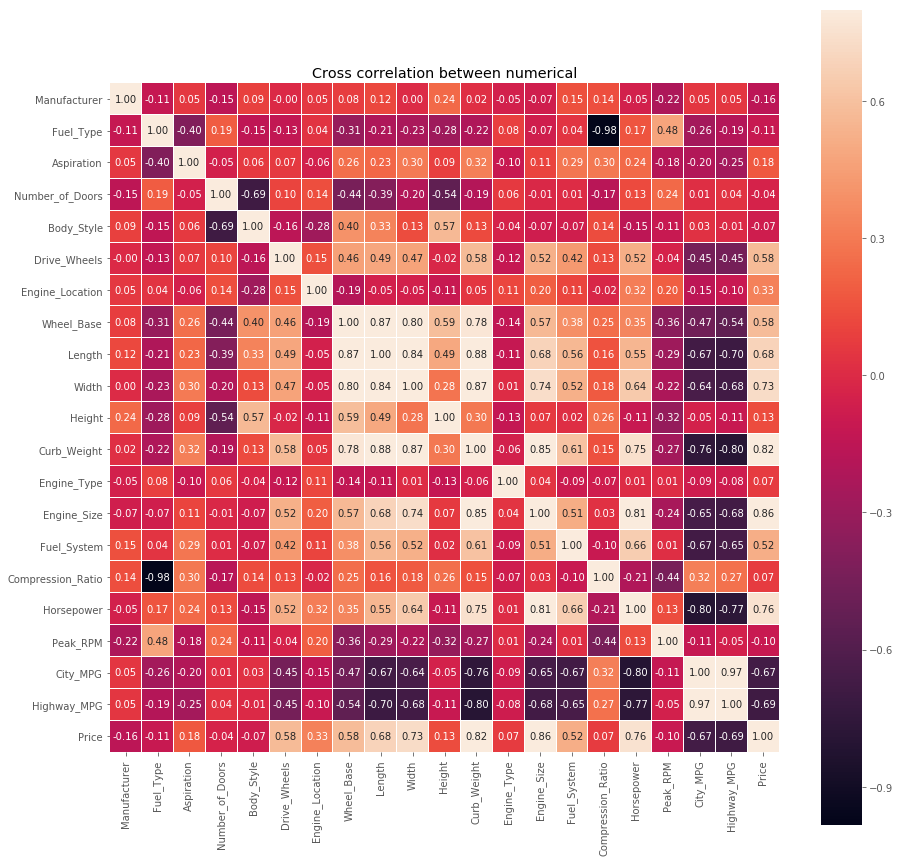

In [1268]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(result.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

In [1269]:
result['Manufacturer'] = result['Manufacturer'].astype(float)
result['Fuel_Type'] = result['Fuel_Type'].astype(float)
result['Aspiration'] = result['Aspiration'].astype(float)
result['Number_of_Doors'] = result['Number_of_Doors'].astype(float)
result['Body_Style'] = result['Body_Style'].astype(float)
result['Drive_Wheels'] = result['Drive_Wheels'].astype(float)
result['Engine_Location'] = result['Engine_Location'].astype(float)
result['Fuel_System'] = result['Fuel_System'].astype(float)
result['Compression_Ratio'] = result['Compression_Ratio'].astype(float)
result['Wheel_Base'] = result['Wheel_Base'].astype(float)
#result['Bore'] = result['Bore'].astype(float)
result['Engine_Type'] = result['Engine_Type'].astype(float)


result['Price'] = result['Price'].astype(int)
result['Engine_Size'] = result['Engine_Size'].astype(int)
result['Curb_Weight'] = result['Curb_Weight'].astype(int)
result['Horsepower'] = result['Horsepower'].astype(int)
result['City_MPG'] = result['City_MPG'].astype(int)
result['Highway_MPG'] = result['Highway_MPG'].astype(int)
result['Length'] = result['Length'].astype(float)
result['Width'] = result['Width'].astype(float)
result['Height'] = result['Height'].astype(float)
#result['Stroke'] = result['Stroke'].astype(float)
result['Peak_RPM'] = result['Peak_RPM'].astype(float)


In [1270]:

columns = "Width Length".split() # Declare the columns names
#diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(data=result, columns=columns) # load the dataset as a pandas data frame

#y = result["Manufacturer"].values.reshape(-1, 1) # define the target variable (dependent variable) as y
#df= df.values.reshape(-1,1)
y = result["Manufacturer"].values.reshape(-1,1)

#X = df["Prevailing_Wages"].values.reshape(-1,1)
#y = target["Case_Status"].values.reshape(-1,1)
#from sklearn.preprocessing import scale
#X = scale(df)
#Y= scale(y)

In [1271]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) 

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

y_pred = knn.predict(x_test)
y_pred

array([ 21.,   8.,  18.,  17.,   1.,  12.,  19.,  19.,  18.,  20.,  12.,
        19.,  19.,  19.,   9.,  19.,   5.,  11.,  11.,  18.,   8.,  20.,
        12.,   5.,   4.,   1.,  19.,  21.,   0.,  21.,   1.,   4.,   0.,
        21.,   4.,  21.,  18.,   8.,   5.,  11.,  18.,  19.,  13.,   0.,
        12.,   8.,   4.,   4.,  13.,  11.,   5.,  12.,  12.,  19.,   0.,
         8.,  19.,   8.,  15.,  11.,  18.,   0.])

In [1273]:


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [1274]:

accuracy=knn.score(x_train, y_train)


In [1300]:
##### creating odd list of K for KNN
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x != 0, myList)
#neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores = cross_val_score(knn, y_test, y_pred, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2), "% for neighbors : ", k)


Accuracy: 73.26 (+/- 0.50) % for neighbors :  1
Accuracy: 37.40 (+/- 0.70) % for neighbors :  2
Accuracy: 59.75 (+/- 0.71) % for neighbors :  3
Accuracy: 60.69 (+/- 0.58) % for neighbors :  4
Accuracy: 47.25 (+/- 0.67) % for neighbors :  5
Accuracy: 41.36 (+/- 0.64) % for neighbors :  6
Accuracy: 41.29 (+/- 0.52) % for neighbors :  7
Accuracy: 39.81 (+/- 0.58) % for neighbors :  8
Accuracy: 32.48 (+/- 0.56) % for neighbors :  9
Accuracy: 35.25 (+/- 0.54) % for neighbors :  10
Accuracy: 32.07 (+/- 0.22) % for neighbors :  11
Accuracy: 27.56 (+/- 0.38) % for neighbors :  12
Accuracy: 30.17 (+/- 0.28) % for neighbors :  13
Accuracy: 36.72 (+/- 0.38) % for neighbors :  14
Accuracy: 37.29 (+/- 0.54) % for neighbors :  15
Accuracy: 44.12 (+/- 0.41) % for neighbors :  16
Accuracy: 29.44 (+/- 0.40) % for neighbors :  17
Accuracy: 26.92 (+/- 0.24) % for neighbors :  18
Accuracy: 29.50 (+/- 0.33) % for neighbors :  19
Accuracy: 27.94 (+/- 0.32) % for neighbors :  20
Accuracy: 19.69 (+/- 0.24) % 

#### KNN algorithm is one of the simplest classification algorithm.
#### Accuracy is the ratio of no. of data points correctly classified to total no. of data points. Here, we are testing accuracy on test data set.
#### To draw a K-Nearest neighbor decision boundary map.
#### First of all, we will have to divide data set into training & testing data.
#### Here we used 10 fold CV since it is giving the maximum accuracy of predicting output using the given variables(features) i.e Width and Length.
#### A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

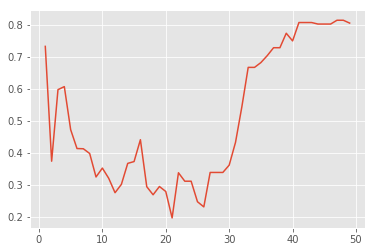

In [1301]:
import matplotlib.pyplot as plt

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(myList, cv_scores)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Cross-Validated Accuracy')

plt.show()

#### As seen in the above graph of Value of K v/s Cross Validation is the value of K decreases initially but increases later.

#### In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. 

#### In our case the best value of acccuracy is obtained when we use 10 Fold CV.

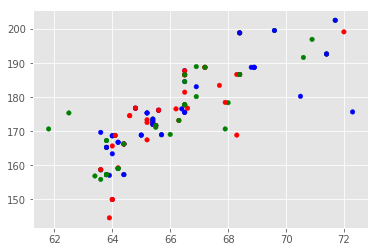

In [1293]:
X = x_train.as_matrix()

colors = ("red","green","blue")

plt.scatter(X[:,0],X[:,1],c=colors,s=20)

plt.show()


#### References:
    
http://benalexkeen.com/k-nearest-neighbours-classification-in-python/
        
http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html